# ETL

In [48]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report
sns.set()

dfpacientes = pd.read_csv("Datasets/BBDD_Hospitalización.csv",sep=",")

In [49]:
# Observamos el dataframe
dfpacientes.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [50]:
#Cambiamos los nombres largos, por algunos mas sencillos
dfpacientes = dfpacientes.rename(columns={'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'INFECCION POSTBIOPSIA EN DIAS',
                                           'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'ANTIBIOTICO PROFILAXIS'})
dfpacientes.sample(5)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,INFECCION POSTBIOPSIA EN DIAS,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
399,51.0,NO,NO,10.80,SI,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
381,77.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
65,52.0,NO,NO,6.00,SI,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
236,60.0,NO,NO,7.20,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [51]:
dfpacientes.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EDAD                               568 non-null    float64
 1   DIABETES                           568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES         568 non-null    object 
 3   PSA                                564 non-null    float64
 4   BIOPSIAS PREVIAS                   566 non-null    object 
 5   VOLUMEN PROSTATICO                 567 non-null    object 
 6   ANTIBIOTICO PROFILAXIS             568 non-null    object 
 7   NUMERO DE MUESTRAS TOMADAS         568 non-null    float64
 8   CUP                                567 non-null    object 
 9   ENF. CRONICA PULMONAR OBSTRUCTIVA  566 non-null    object 
 10  BIOPSIA                            568 non-null    object 
 11  INFECCION POSTBIOPSIA EN DIAS      568 non-null    object 

In [52]:
dfpacientes.isna().sum()

EDAD                                  2
DIABETES                              2
HOSPITALIZACIÓN ULTIMO MES            2
PSA                                   6
BIOPSIAS PREVIAS                      4
VOLUMEN PROSTATICO                    3
ANTIBIOTICO PROFILAXIS                2
NUMERO DE MUESTRAS TOMADAS            2
CUP                                   3
ENF. CRONICA PULMONAR OBSTRUCTIVA     4
BIOPSIA                               2
INFECCION POSTBIOPSIA EN DIAS         2
FIEBRE                                2
ITU                                   2
TIPO DE CULTIVO                       2
AGENTE AISLADO                       19
PATRON DE RESISTENCIA                 2
HOSPITALIZACION                       5
DIAS HOSPITALIZACION MQ               2
DIAS HOSPITALIZACIÓN UPC              2
dtype: int64

In [53]:
# Imputamos por el numero siguiente los valores faltantes
dfpacientes['INFECCION POSTBIOPSIA EN DIAS'].fillna(method="ffill", inplace=True)
dfpacientes['BIOPSIAS PREVIAS'].fillna(method="ffill", inplace=True)
dfpacientes['VOLUMEN PROSTATICO'].fillna(method="ffill", inplace=True)
dfpacientes['CUP'].fillna(method="ffill", inplace=True)
dfpacientes['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna(method="ffill", inplace=True)

# Se imputa PSA por la media, con el metodo fillna, para poder llenar esos valores faltantes
dfpacientes['PSA'].fillna((dfpacientes['PSA'].mean()), inplace=True)

# Al agente aislado que era la columna mas vacia lo imputamos por la moda(la cual es siempre no), ya que es categorica
dfpacientes['AGENTE AISLADO'].fillna('NO', inplace=True)

# Eliminamos las filas donde el valor de la columna 'HOSPITALIZACION' es nulo (NaN)
dfpacientes =dfpacientes.dropna(subset=['HOSPITALIZACION'])

In [54]:
dfpacientes.isna().sum()

EDAD                                 0
DIABETES                             0
HOSPITALIZACIÓN ULTIMO MES           0
PSA                                  0
BIOPSIAS PREVIAS                     0
VOLUMEN PROSTATICO                   0
ANTIBIOTICO PROFILAXIS               0
NUMERO DE MUESTRAS TOMADAS           0
CUP                                  0
ENF. CRONICA PULMONAR OBSTRUCTIVA    0
BIOPSIA                              0
INFECCION POSTBIOPSIA EN DIAS        0
FIEBRE                               0
ITU                                  0
TIPO DE CULTIVO                      0
AGENTE AISLADO                       0
PATRON DE RESISTENCIA                0
HOSPITALIZACION                      0
DIAS HOSPITALIZACION MQ              0
DIAS HOSPITALIZACIÓN UPC             0
dtype: int64

In [55]:
# Corregimos el tipo de datos para que coincida con el formato correcto

dfpacientes['DIABETES']=dfpacientes['DIABETES'].astype('category')
dfpacientes['HOSPITALIZACIÓN ULTIMO MES']=dfpacientes['HOSPITALIZACIÓN ULTIMO MES'].astype('category')
dfpacientes['BIOPSIAS PREVIAS']=dfpacientes['BIOPSIAS PREVIAS'].astype('category')
dfpacientes['VOLUMEN PROSTATICO']=dfpacientes['VOLUMEN PROSTATICO'].astype('category')
dfpacientes['ANTIBIOTICO PROFILAXIS']=dfpacientes['ANTIBIOTICO PROFILAXIS'].astype('category')
dfpacientes['ENF. CRONICA PULMONAR OBSTRUCTIVA']=dfpacientes['ENF. CRONICA PULMONAR OBSTRUCTIVA'].astype('category')
dfpacientes['CUP']=dfpacientes['CUP'].astype('category')
dfpacientes['BIOPSIA']=dfpacientes['BIOPSIA'].astype('category')
dfpacientes['FIEBRE']=dfpacientes['FIEBRE'].astype('category')
dfpacientes['ITU']=dfpacientes['ITU'].astype('category')
dfpacientes['TIPO DE CULTIVO']=dfpacientes['TIPO DE CULTIVO'].astype('category')
dfpacientes['AGENTE AISLADO']=dfpacientes['AGENTE AISLADO'].astype('category')
dfpacientes['PATRON DE RESISTENCIA']=dfpacientes['PATRON DE RESISTENCIA'].astype('category')
dfpacientes['HOSPITALIZACION']=dfpacientes['HOSPITALIZACION'].astype('category')

dfpacientes['PSA']=dfpacientes['PSA'].astype('Float64')
dfpacientes['EDAD']=dfpacientes['EDAD'].astype(int)

#Conversion a variables numericas, pero antes se debe reemplazar los no, por un cero
dfpacientes["INFECCION POSTBIOPSIA EN DIAS"].replace({"NO": "0"}, inplace=True)
dfpacientes['INFECCION POSTBIOPSIA EN DIAS'] = dfpacientes['INFECCION POSTBIOPSIA EN DIAS'] .values.astype(int)

In [56]:
dfpacientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   EDAD                               565 non-null    int32   
 1   DIABETES                           565 non-null    category
 2   HOSPITALIZACIÓN ULTIMO MES         565 non-null    category
 3   PSA                                565 non-null    Float64 
 4   BIOPSIAS PREVIAS                   565 non-null    category
 5   VOLUMEN PROSTATICO                 565 non-null    category
 6   ANTIBIOTICO PROFILAXIS             565 non-null    category
 7   NUMERO DE MUESTRAS TOMADAS         565 non-null    float64 
 8   CUP                                565 non-null    category
 9   ENF. CRONICA PULMONAR OBSTRUCTIVA  565 non-null    category
 10  BIOPSIA                            565 non-null    category
 11  INFECCION POSTBIOPSIA EN DIAS      565 non-nu

In [57]:
dfpacientes.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,INFECCION POSTBIOPSIA EN DIAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,565.000000,565.0,565.000000,565.000000,565.000000,565.000000
mean,63.870796,13.300098,13.001770,0.132743,0.166372,0.014159
std,9.295538,15.649307,3.930919,0.747388,0.960534,0.196993
min,39.000000,0.6,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.6,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.0,12.000000,0.000000,0.000000,0.000000
75%,69.000000,15.0,12.000000,0.000000,0.000000,0.000000
max,151.000000,100.0,24.000000,9.000000,12.000000,3.000000


In [58]:
# Vamos a reemplazar por 0 y 1 las columnas que solo tienen como respuesta los datos booleanos

dfpacientes["BIOPSIAS PREVIAS"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["DIABETES"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["VOLUMEN PROSTATICO"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["ENF. CRONICA PULMONAR OBSTRUCTIVA"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["ITU"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["FIEBRE"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["HOSPITALIZACION"].replace({"NO":"0", "SI":"1"},inplace=True)

In [59]:
dfpacientes.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,INFECCION POSTBIOPSIA EN DIAS,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,0,NO,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,0,NEG,1,1,0,NO,NO,NO,1,2.0,0.0
1,56,0,NO,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,0,NEG,1,1,0,NO,NO,NO,1,5.0,0.0
2,57,0,NO,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4.0,3.0
3,56,0,NO,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,0,NEG,1,1,0,NO,NO,NO,1,5.0,0.0
4,55,0,NO,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1,4.0,3.0


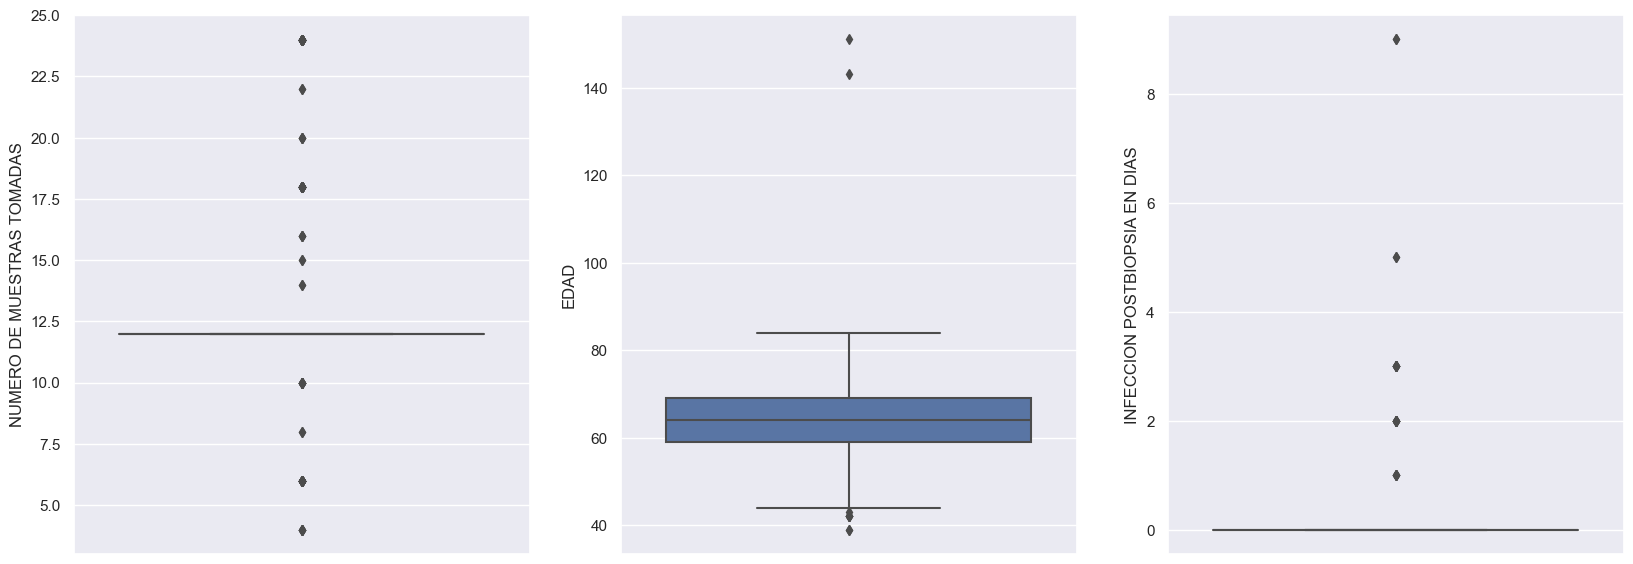

In [60]:
# Hacemos los boxplots con cuantitativos

fig=plt.figure(figsize=(20,7))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

sns.boxplot(data=dfpacientes,y='NUMERO DE MUESTRAS TOMADAS',ax=ax1);
sns.boxplot(data=dfpacientes,y='EDAD',ax=ax2);
sns.boxplot(data=dfpacientes,y='INFECCION POSTBIOPSIA EN DIAS',ax=ax3);

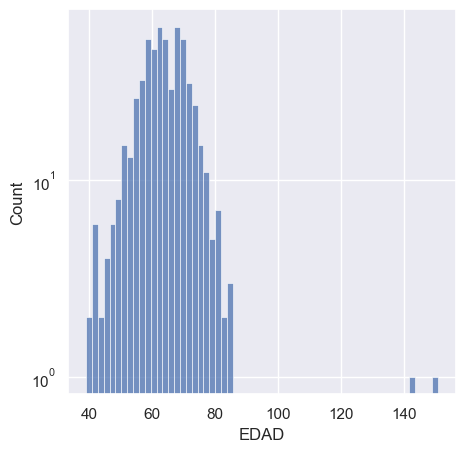

In [61]:
# Hacemos un histplot para analizar la columna de edad
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
sns.histplot(data=dfpacientes,x='EDAD',bins=60);
ax.set_yscale('log')

In [62]:
# Corregimos los valores atípicos
media_edad = dfpacientes['EDAD'].mean()
mascara = dfpacientes['EDAD'] > 90
dfpacientes.loc[mascara, 'EDAD'] = media_edad

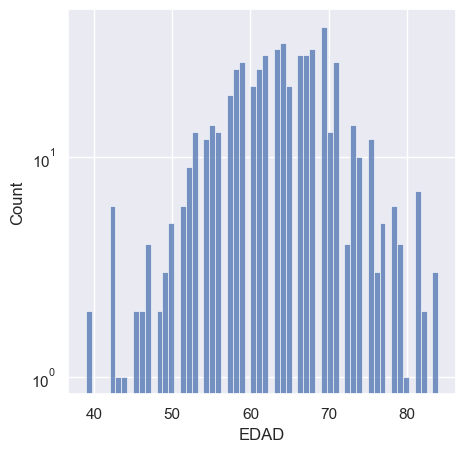

In [63]:
# Hacemos un histplot para analizar la columna de edad
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
sns.histplot(data=dfpacientes,x='EDAD',bins=60);
ax.set_yscale('log')

In [64]:
dfpacientes.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,INFECCION POSTBIOPSIA EN DIAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,565.000000,565.0,565.000000,565.000000,565.000000,565.000000
mean,63.576534,13.300098,13.001770,0.132743,0.166372,0.014159
std,7.858649,15.649307,3.930919,0.747388,0.960534,0.196993
min,39.000000,0.6,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.6,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.0,12.000000,0.000000,0.000000,0.000000
75%,69.000000,15.0,12.000000,0.000000,0.000000,0.000000
max,84.000000,100.0,24.000000,9.000000,12.000000,3.000000


In [65]:
# Colocamos correctamente el tipo de dato
dfpacientes['EDAD']=dfpacientes['EDAD'].astype(int)

dfpacientes.sample(5)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,INFECCION POSTBIOPSIA EN DIAS,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
34,53,0,NO,90.0,0,1,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,1,ADENOCARCINOMA GLEASON 9,0,0,0,NO,NO,NO,0,0.0,0.0
236,60,0,NO,7.2,0,0,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,0,NEG,0,0,0,NO,NO,NO,0,0.0,0.0
117,62,0,NO,5.2,0,0,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,0,NEG,0,0,0,NO,NO,NO,0,0.0,0.0
384,68,0,NO,11.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,0,NEG,0,0,0,NO,NO,NO,0,0.0,0.0
454,61,0,NO,18.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,0,NEG,0,0,0,NO,NO,NO,0,0.0,0.0


In [66]:
pd.pivot_table(dfpacientes,index='ANTIBIOTICO PROFILAXIS',values='EDAD',aggfunc='mean')


,EDAD
ANTIBIOTICO PROFILAXIS,
CEFALOSPORINA_AMINOGLUCOCIDO,60.821429
FLUOROQUINOLONA_AMINOGLICOSIDO,63.632287
FLUOROQUINOLONA_AMINOGLICÓSIDO,65.666667
OROQUINOLONAS,66.444444
OTROS,65.238095


In [67]:
# Reemplazamos el valor que no tenia tilde, por el que si la tenia
dfpacientes['ANTIBIOTICO PROFILAXIS'] = dfpacientes['ANTIBIOTICO PROFILAXIS'].replace('FLUOROQUINOLONA_AMINOGLICOSIDO', 'FLUOROQUINOLONA_AMINOGLICÓSIDO')

In [68]:
pd.pivot_table(dfpacientes,index='ANTIBIOTICO PROFILAXIS',values='EDAD',aggfunc='mean')

,EDAD
ANTIBIOTICO PROFILAXIS,
CEFALOSPORINA_AMINOGLUCOCIDO,60.821429
FLUOROQUINOLONA_AMINOGLICÓSIDO,63.645880
OROQUINOLONAS,66.444444
OTROS,65.238095


In [69]:
dfpacientes.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,INFECCION POSTBIOPSIA EN DIAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,565.000000,565.0,565.000000,565.000000,565.000000,565.000000
mean,63.573451,13.300098,13.001770,0.132743,0.166372,0.014159
std,7.858704,15.649307,3.930919,0.747388,0.960534,0.196993
min,39.000000,0.6,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.6,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.0,12.000000,0.000000,0.000000,0.000000
75%,69.000000,15.0,12.000000,0.000000,0.000000,0.000000
max,84.000000,100.0,24.000000,9.000000,12.000000,3.000000


In [70]:
# Utilizamos la funcion dummies en las variables categoricas para convertirlas en 0 y 1

dummies = pd.get_dummies(dfpacientes["ANTIBIOTICO PROFILAXIS"])
dummies = pd.get_dummies(dfpacientes["BIOPSIA"])
dummies = pd.get_dummies(dfpacientes["TIPO DE CULTIVO"])
dummies = pd.get_dummies(dfpacientes["AGENTE AISLADO"])
dummies = pd.get_dummies(dfpacientes["PATRON DE RESISTENCIA"])
dummies.sample(5)

,"AMPI R, CIPRO R, GENTA R, SULFA M R",MULTI SENSIBLE,NO,"RESISTENTE A AMPI, CIPRO Y GENTA","RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
440,0,0,1,0,0
517,0,0,1,0,0
499,0,0,1,0,0
218,0,0,1,0,0
424,0,0,1,0,0


In [71]:
# Despues de crearlas, es necesario concatenarlas en la base de datos real
dfpacientes = pd.concat([dfpacientes, dummies], axis=1)

# Cuando ya se concatenan, es necesario eliminar la columna original
dfpacientes.drop("ANTIBIOTICO PROFILAXIS", axis=1, inplace=True)
dfpacientes.drop("BIOPSIA", axis=1, inplace=True)
dfpacientes.drop("TIPO DE CULTIVO", axis=1, inplace=True)
dfpacientes.drop("AGENTE AISLADO", axis=1, inplace=True)
dfpacientes.drop("NO", axis=1, inplace=True)
dfpacientes.drop("PATRON DE RESISTENCIA", axis=1, inplace=True)
dfpacientes.drop("DIAS HOSPITALIZACION MQ", axis=1, inplace=True)

In [72]:
dfpacientes.sample(10)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,INFECCION POSTBIOPSIA EN DIAS,FIEBRE,ITU,HOSPITALIZACION,DIAS HOSPITALIZACIÓN UPC,"AMPI R, CIPRO R, GENTA R, SULFA M R",MULTI SENSIBLE,"RESISTENTE A AMPI, CIPRO Y GENTA","RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
233,54,0,NO,6.0,0,1,12.0,NO,0,0,0,0,0,0.0,0,0,0,0
48,84,0,NO,40.0,0,1,6.0,SI,0,0,0,0,0,0.0,0,0,0,0
63,65,0,NO,5.2,0,1,12.0,NO,0,0,0,0,0,0.0,0,0,0,0
403,59,0,NO,9.4,0,0,10.0,NO,0,0,0,0,0,0.0,0,0,0,0
39,66,0,NO,6.4,0,1,12.0,NO,1,0,0,0,0,0.0,0,0,0,0
16,65,1,NO,5.19,0,1,24.0,NO,0,3,1,0,1,0.0,0,0,0,0
221,57,0,NO,8.1,0,1,12.0,NO,0,0,0,0,0,0.0,0,0,0,0
81,56,0,NO,4.7,0,1,12.0,NO,0,0,0,0,0,0.0,0,0,0,0
12,69,0,NO,5.7,0,0,12.0,NO,0,2,1,0,1,0.0,0,0,0,0
458,54,0,NO,6.3,0,1,12.0,NO,0,0,0,0,0,0.0,0,0,0,0


In [73]:
dfpacientes["HOSPITALIZACIÓN ULTIMO MES"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["CUP"].replace({"NO":"0", "SI":"1"},inplace=True)
dfpacientes["ENF. CRONICA PULMONAR OBSTRUCTIVA"].replace({"SI, EPOC":"1", "SI, ASMA":"1"},inplace=True)

In [74]:
# Cambiamos los nombres de las nuevas dummies
dfpacientes.rename(columns={' AMPI R, CIPRO R, GENTA R, SULFA M R': 'AMCG SR'}, inplace=True) 
dfpacientes.rename(columns={'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA': 'AMSFCC CR'}, inplace=True)
dfpacientes.rename(columns={'RESISTENTE A AMPI, CIPRO Y GENTA': 'ACG SR'}, inplace=True)
dfpacientes.sample(5)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,INFECCION POSTBIOPSIA EN DIAS,FIEBRE,ITU,HOSPITALIZACION,DIAS HOSPITALIZACIÓN UPC,AMCG SR,MULTI SENSIBLE,ACG SR,AMSFCC CR
210,74,0,0,30.0,0,1,12.0,0,0,0,0,0,0,0.0,0,0,0,0
3,56,0,0,7.0,0,1,12.0,0,0,1,1,0,1,0.0,0,0,0,0
41,75,1,0,5.8,0,1,12.0,0,1,0,0,0,0,0.0,0,0,0,0
67,52,0,0,5.2,0,1,16.0,0,0,0,0,0,0,0.0,0,0,0,0
314,49,0,0,5.0,0,0,12.0,0,0,0,0,0,0,0.0,0,0,0,0


In [75]:
dfpacientes.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,INFECCION POSTBIOPSIA EN DIAS,DIAS HOSPITALIZACIÓN UPC,AMCG SR,MULTI SENSIBLE,ACG SR,AMSFCC CR
count,565.000000,565.0,565.000000,565.000000,565.000000,565.00000,565.000000,565.000000,565.000000
mean,63.573451,13.300098,13.001770,0.132743,0.014159,0.00177,0.003540,0.003540,0.003540
std,7.858704,15.649307,3.930919,0.747388,0.196993,0.04207,0.059444,0.059444,0.059444
min,39.000000,0.6,4.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,59.000000,5.6,12.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,64.000000,8.0,12.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,69.000000,15.0,12.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,84.000000,100.0,24.000000,9.000000,3.000000,1.00000,1.000000,1.000000,1.000000


In [76]:
print(dfpacientes.columns)

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA',
       'INFECCION POSTBIOPSIA EN DIAS', 'FIEBRE', 'ITU', 'HOSPITALIZACION',
       'DIAS HOSPITALIZACIÓN UPC', 'AMCG SR', 'MULTI SENSIBLE', 'ACG SR',
       'AMSFCC CR'],
      dtype='object')


<Axes: xlabel='HOSPITALIZACION', ylabel='count'>

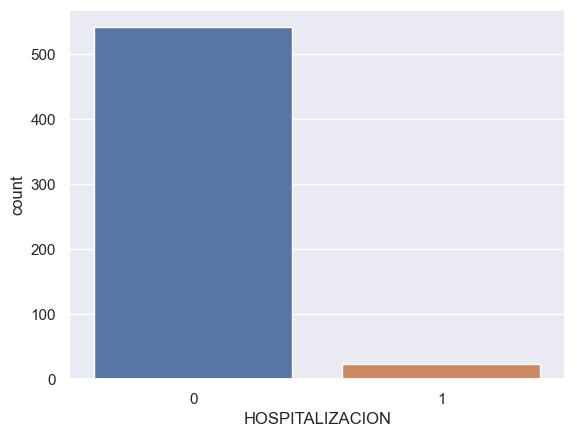

In [77]:
# Se observa como se comporta la variable objetivo
sns.countplot(data=dfpacientes,x='HOSPITALIZACION')

C:\Users\matia\AppData\Local\Temp\ipykernel_24520\1557829379.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfpacientes.corr()


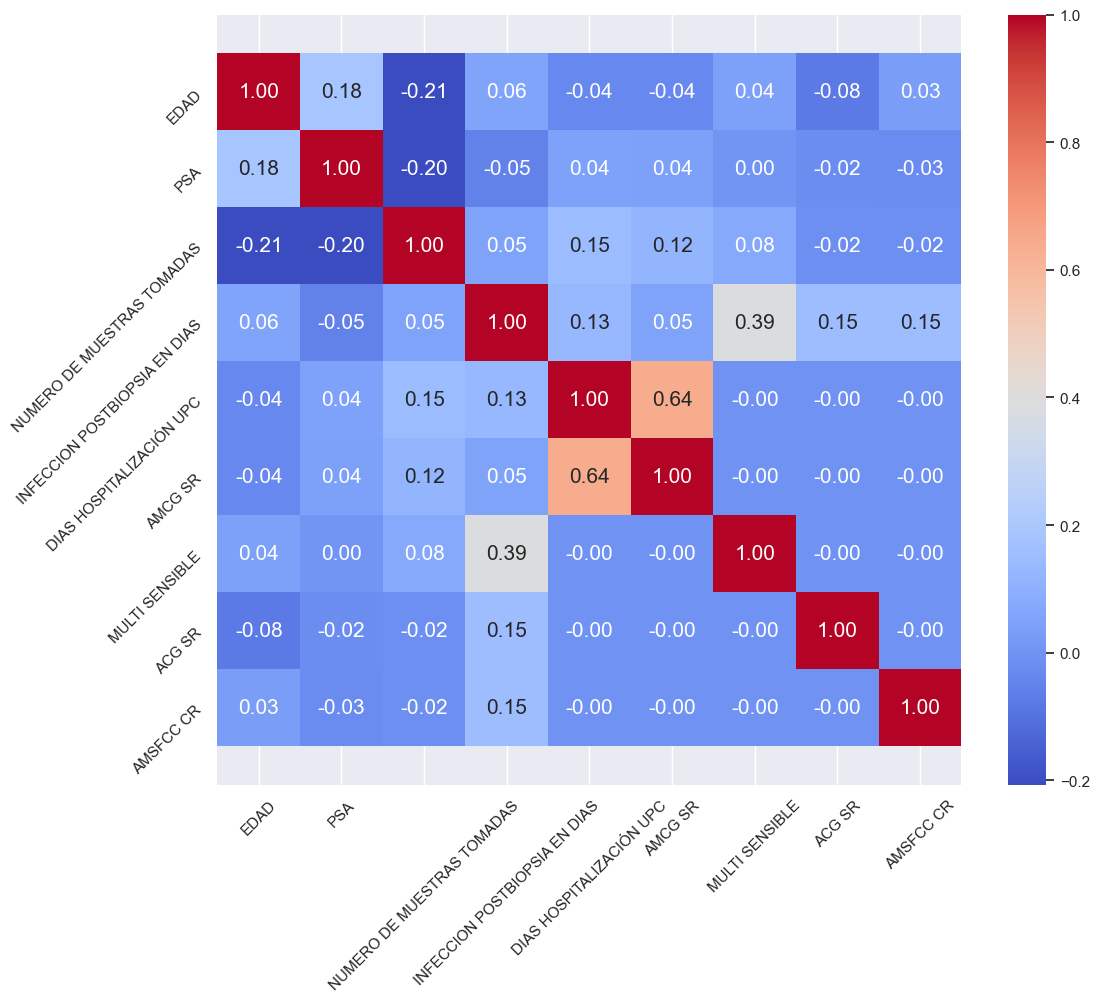

In [78]:
# Creamos la matriz de correlación
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

corr = dfpacientes.corr()
plot_corre_heatmap(corr)  

In [79]:
dfpacientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 567
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   EDAD                               565 non-null    int32   
 1   DIABETES                           565 non-null    category
 2   HOSPITALIZACIÓN ULTIMO MES         565 non-null    category
 3   PSA                                565 non-null    Float64 
 4   BIOPSIAS PREVIAS                   565 non-null    category
 5   VOLUMEN PROSTATICO                 565 non-null    category
 6   NUMERO DE MUESTRAS TOMADAS         565 non-null    float64 
 7   CUP                                565 non-null    category
 8   ENF. CRONICA PULMONAR OBSTRUCTIVA  565 non-null    category
 9   INFECCION POSTBIOPSIA EN DIAS      565 non-null    int32   
 10  FIEBRE                             565 non-null    category
 11  ITU                                565 non-nu

In [80]:
# Acomodamos los tipos de datos correspondientes para el pairplot
dfpacientes['DIAS HOSPITALIZACIÓN UPC']=dfpacientes['DIAS HOSPITALIZACIÓN UPC'].astype("uint8")
dfpacientes['NUMERO DE MUESTRAS TOMADAS']=dfpacientes['NUMERO DE MUESTRAS TOMADAS'].astype("uint8")
dfpacientes['PSA']=dfpacientes['PSA'].astype("uint8")

c:\Users\matia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\matia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\matia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\matia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\matia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarn

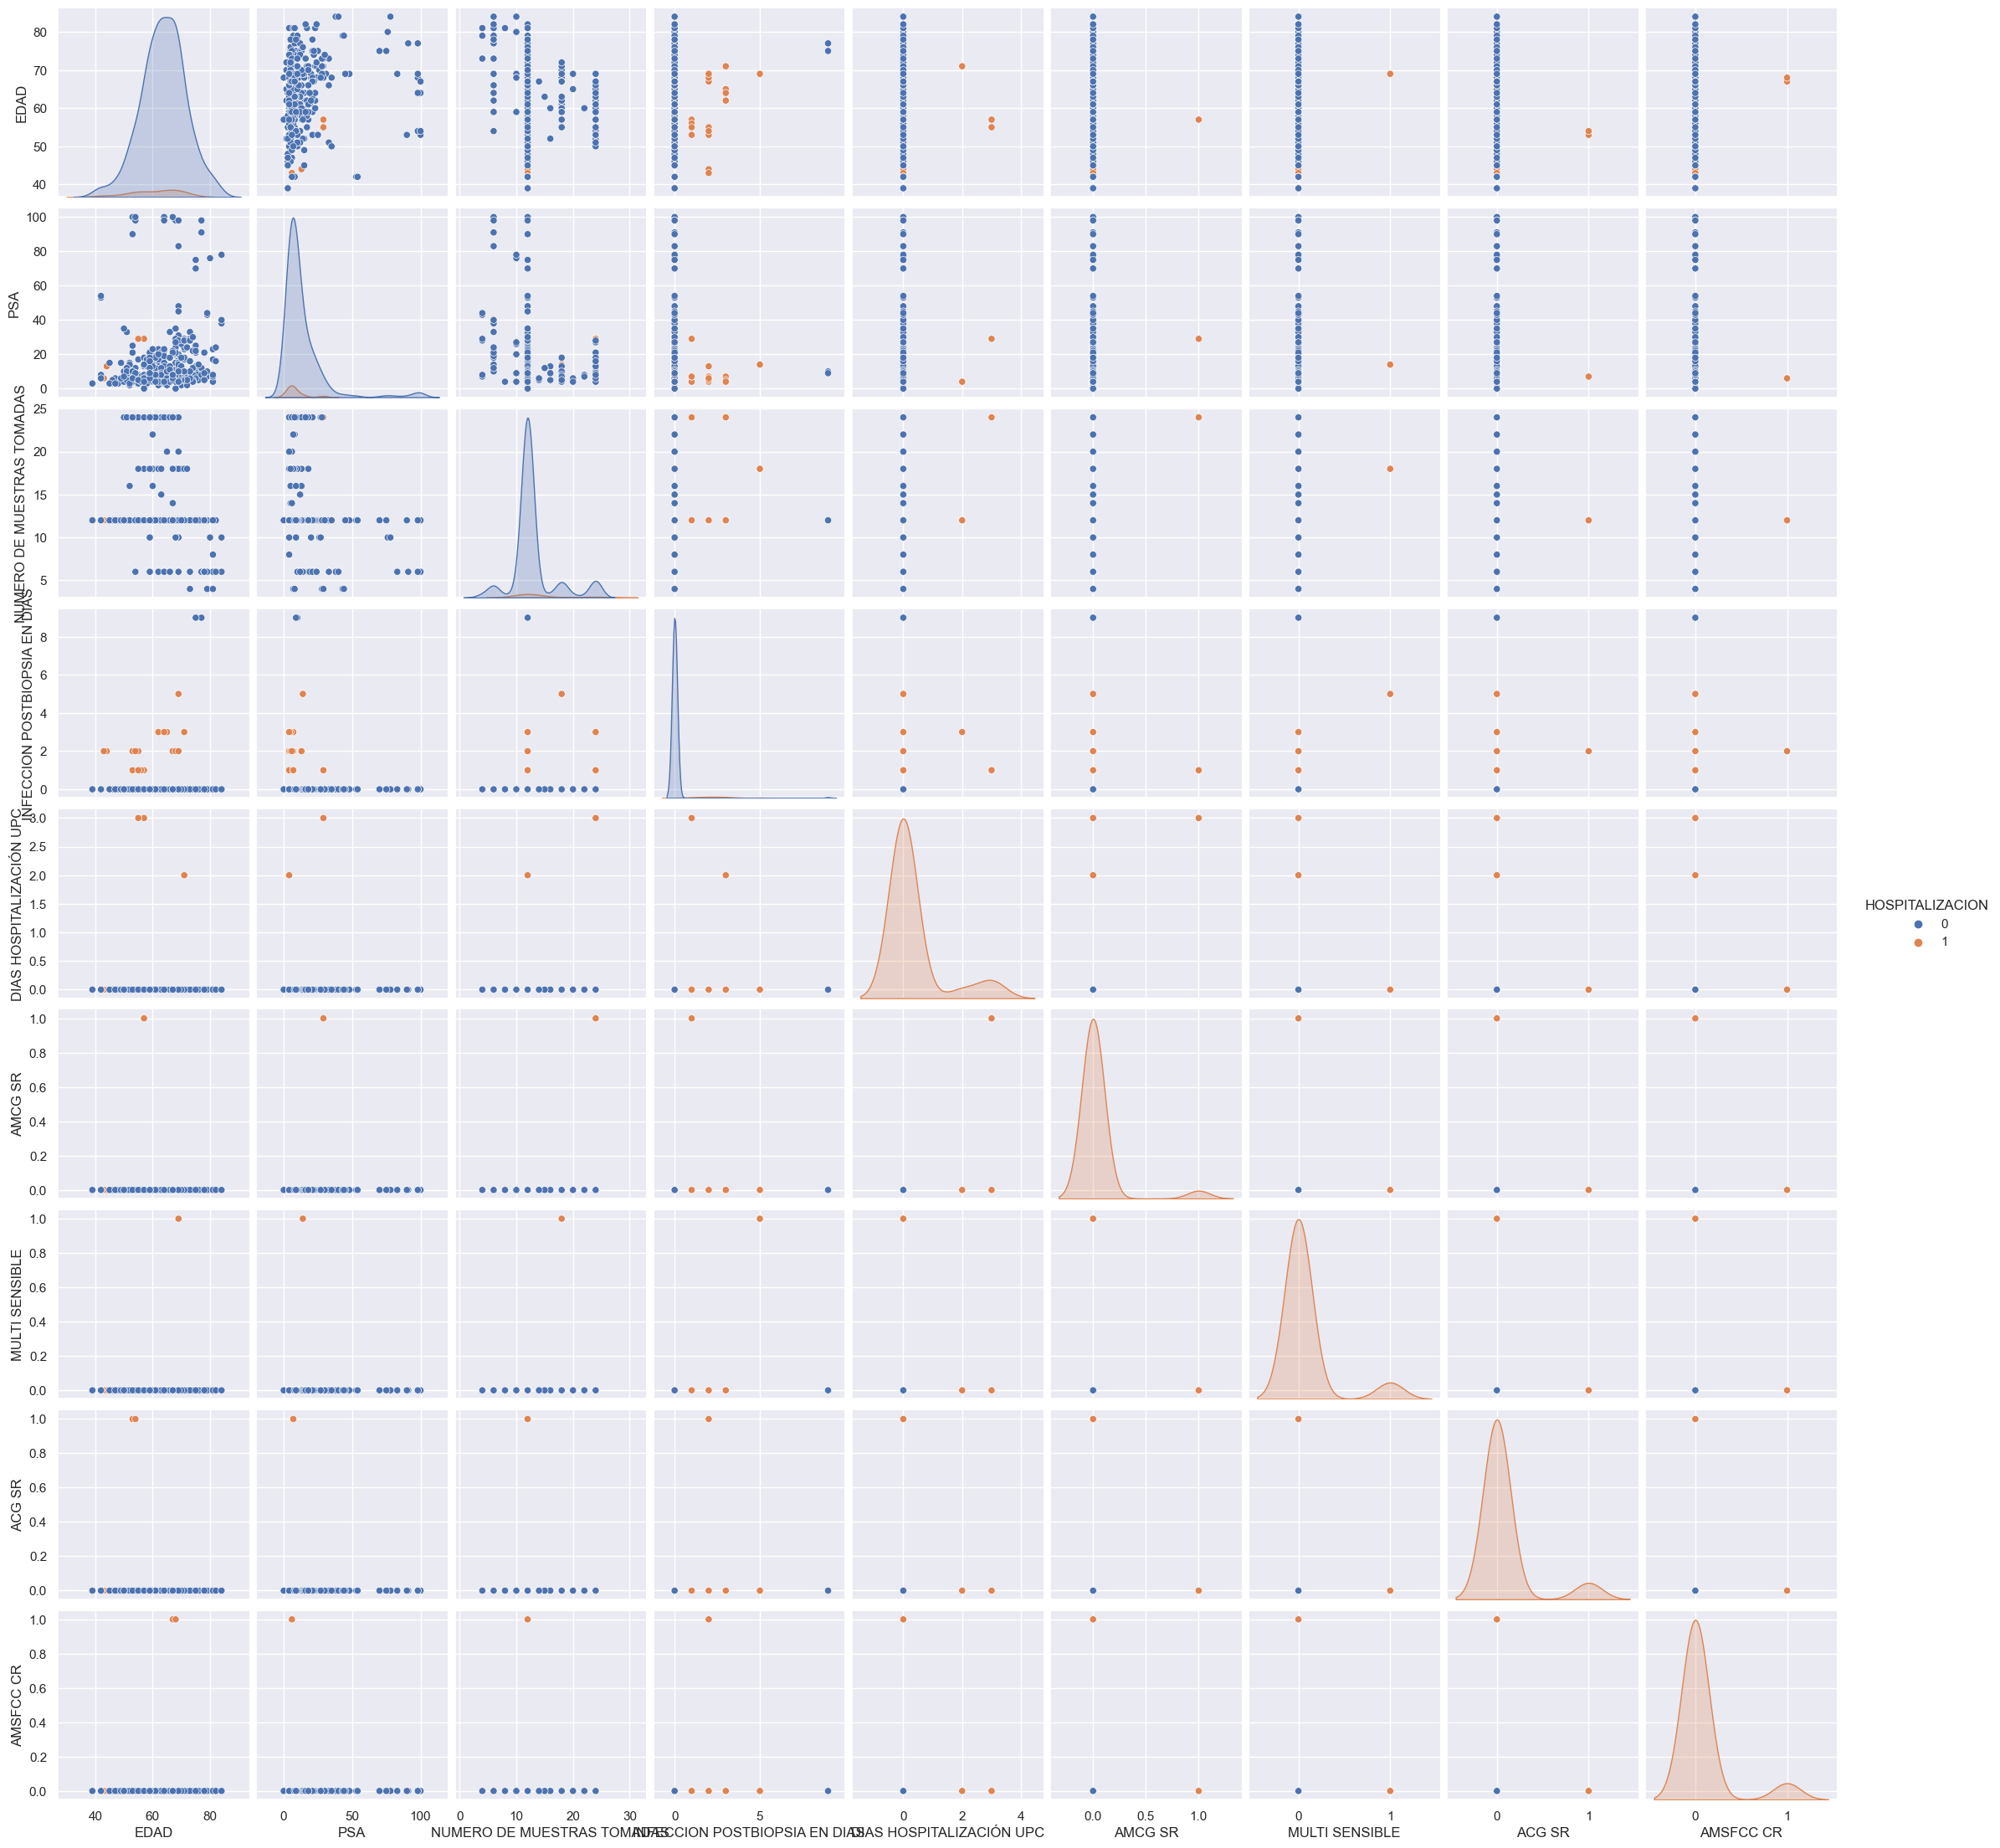

In [81]:
# Hacemos un pairplot
sns.pairplot(dfpacientes, hue="HOSPITALIZACION")
plt.show()

# Modelos de machine learning

In [82]:
# Definimos X e Y
X = dfpacientes[['PSA', 'NUMERO DE MUESTRAS TOMADAS','EDAD','NUMERO DE MUESTRAS TOMADAS','DIABETES','HOSPITALIZACIÓN ULTIMO MES','BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'FIEBRE', 'ITU', 'AMCG SR', 'AMSFCC CR','ACG SR' ]]  
                                                     
y = dfpacientes.HOSPITALIZACION

In [83]:
X

,PSA,NUMERO DE MUESTRAS TOMADAS,EDAD,NUMERO DE MUESTRAS TOMADAS,DIABETES,HOSPITALIZACIÓN ULTIMO MES,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,FIEBRE,ITU,AMCG SR,AMSFCC CR,ACG SR
0,4,12,53,12,0,0,0,1,0,0,1,0,0,0,0
1,7,12,56,12,0,0,0,1,0,0,1,0,0,0,0
2,29,24,57,24,0,0,1,1,0,0,1,0,1,0,0
3,7,12,56,12,0,0,0,1,0,0,1,0,0,0,0
4,29,24,55,24,0,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,6,12,67,12,0,0,0,1,0,0,0,0,0,0,0
564,4,12,64,12,0,0,0,1,0,0,0,0,0,0,0
565,4,20,69,20,0,0,0,1,0,0,0,0,0,0,0
566,8,12,67,12,0,0,0,1,0,0,0,0,0,0,0


In [84]:
y

0      1
1      1
2      1
3      1
4      1
      ..
563    0
564    0
565    0
566    0
567    0
Name: HOSPITALIZACION, Length: 565, dtype: category
Categories (2, object): ['0', '1']

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Instanciamos un objeto de la clase DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5, random_state = 42) 

# Separamos los datos
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state=0)

# Entrenamos el modelo
clf.fit(X_Train.values,Y_Train.values)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [86]:
print(clf.classes_) #Hospitalizacion solo tiene 2 clases en los registros SI y NO
print(clf.n_classes_) #La cantidad de estas clases
print(clf.max_features_) #Numero maximo de caracteristicas
print(clf.feature_importances_) # Importancia de las caracteristicas

['0' '1']
2
15
[0.2625839  0.00236239 0.09276761 0.09405047 0.03056205 0.02118121
 0.         0.04414518 0.         0.         0.4523472  0.
 0.         0.         0.        ]


In [87]:
# Predecimos 
y_pred_train = clf.predict(X_Train.values)
y_pred_test = clf.predict(X_Test.values)

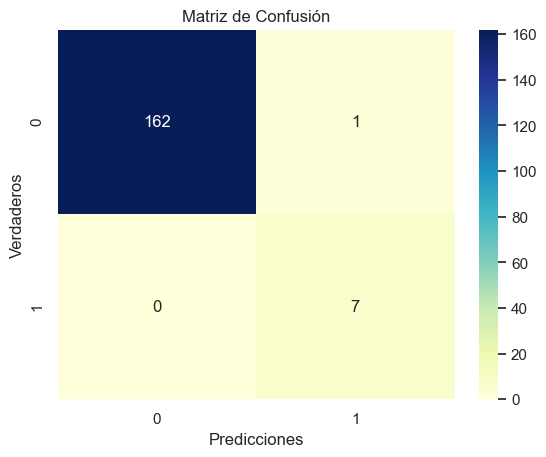

In [88]:
#Ahora hacemos la matriz de confusion
cm = confusion_matrix(Y_Test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Matriz de Confusión")
plt.ylabel("Verdaderos")
plt.xlabel("Predicciones")
plt.show()

In [89]:
# Calculamos las métricas de evaluación en base a la matriz de confusión
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)


print("Especificidad: {:.2f}".format(specificity))
print("Precisión: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Exactitud (Accuracy): {:.2f}".format(accuracy))

f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-Score: {:.2f}".format(f1_score))


Especificidad: 0.99
Precisión: 0.88
Recall: 1.00
Exactitud (Accuracy): 0.99
F1-Score: 0.93


In [90]:
# Calculamos la exactitud
from sklearn.metrics import accuracy_score
print("Test: ",accuracy_score(Y_Test,y_pred_test))
print("Train: ",accuracy_score(Y_Train,y_pred_train))



Test:  0.9941176470588236
Train:  0.9949367088607595


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


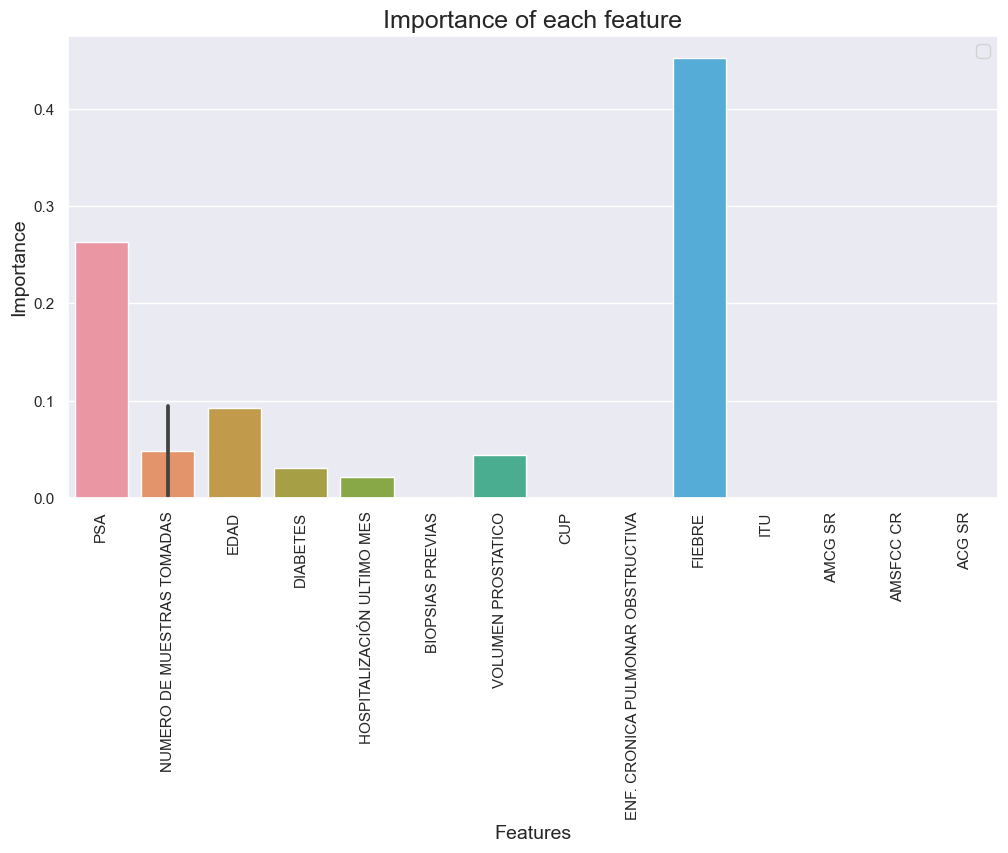

In [91]:
# Vemos la importancia de las variables
plt.figure(figsize=(12, 6))

importances = clf.feature_importances_
columns = X.columns

# Rotar el texto de los nombres de las columnas
sns.barplot(x=columns, y=importances)
plt.xticks(rotation=90)

# Ajustar el tamaño de fuente de los nombres de las columnas
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)

# Usar una paleta de colores más legible
colors = sns.color_palette('viridis', len(columns))
sns.set_palette(colors)

# Ajustar el tamaño de fuente de la leyenda
plt.title('Importance of each feature', fontsize=18)
plt.legend(fontsize=12)

plt.show()


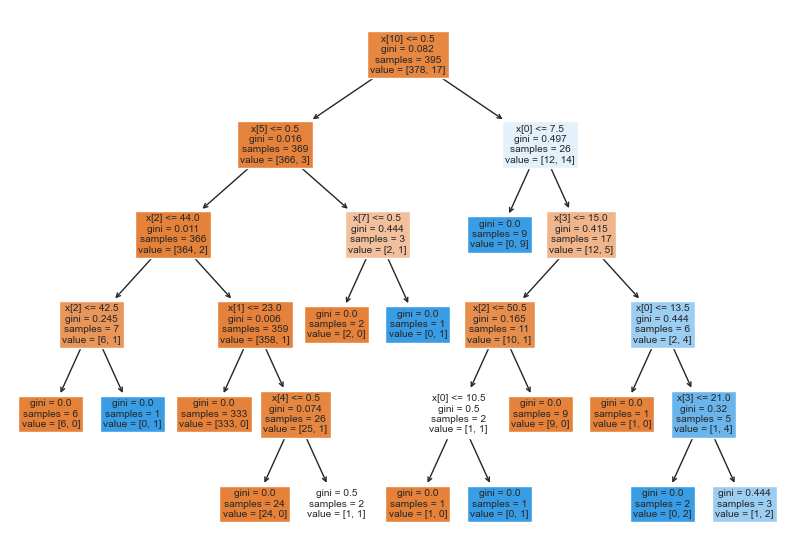

In [92]:
# Vemos el diagrama de árbol
from sklearn import tree
plt.figure(figsize = (10,7))
tree.plot_tree(clf, filled = True)
plt.show()